In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('master.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k population  Year  HDI for year  gdp_for_year ($)   \
0                      6.71  1987           NaN  $2,156,624,900.00   
1                      5.19  1987           NaN  $2,156,624,900.00   
2                      4.83  1987           NaN  $2,156,624,900.00   
3                      4.59  1987           NaN  $2,156,624,900.00   
4                      3.28  1987           NaN  $2,156,624,900.00   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

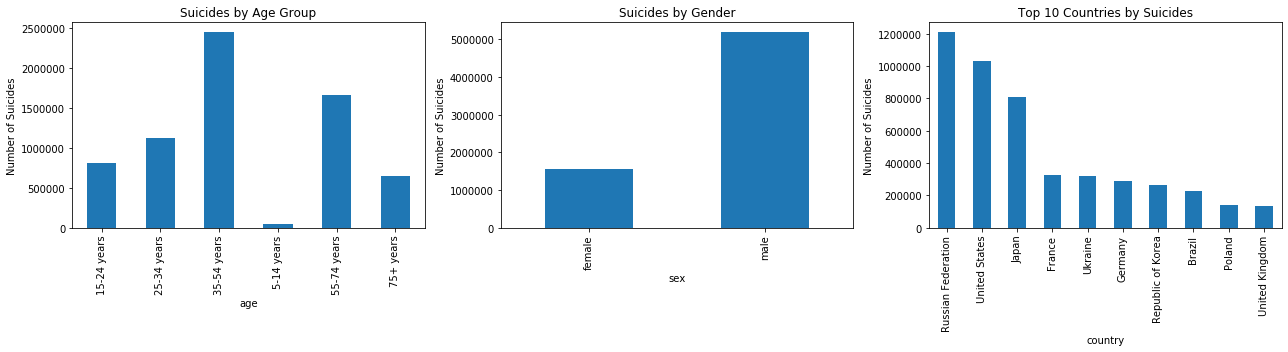

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Grouping data by different categories to see the distribution of suicides
group_by_age = data.groupby('age')['suicides_no'].sum()
group_by_sex = data.groupby('sex')['suicides_no'].sum()
group_by_country = data.groupby('country')['suicides_no'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(18, 5))

# Plot by age
plt.subplot(1, 3, 1)
group_by_age.plot(kind='bar')
plt.title('Suicides by Age Group')
plt.ylabel('Number of Suicides')

# Plot by sex
plt.subplot(1, 3, 2)
group_by_sex.plot(kind='bar')
plt.title('Suicides by Gender')
plt.ylabel('Number of Suicides')

# Plot by country (top 10)
plt.subplot(1, 3, 3)
group_by_country.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Suicides')
plt.ylabel('Number of Suicides')

plt.tight_layout()
plt.show()


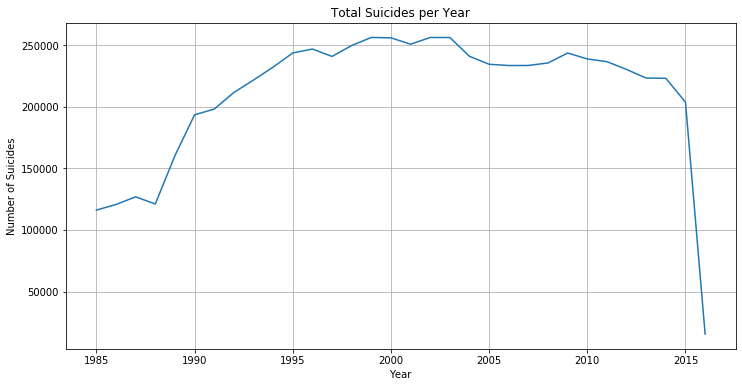

((1999, 256119), (2016, 15603))

In [3]:
# Grouping data by year to find the year with the most and least suicides
group_by_year = data.groupby('year')['suicides_no'].sum()

# Finding the year with the most and the least suicides
year_most_suicides = group_by_year.idxmax()
year_least_suicides = group_by_year.idxmin()
most_suicides = group_by_year.max()
least_suicides = group_by_year.min()

# Plotting suicides over years
plt.figure(figsize=(12, 6))
group_by_year.plot()
plt.title('Total Suicides per Year')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.grid(True)
plt.show()

(year_most_suicides, most_suicides), (year_least_suicides, least_suicides)


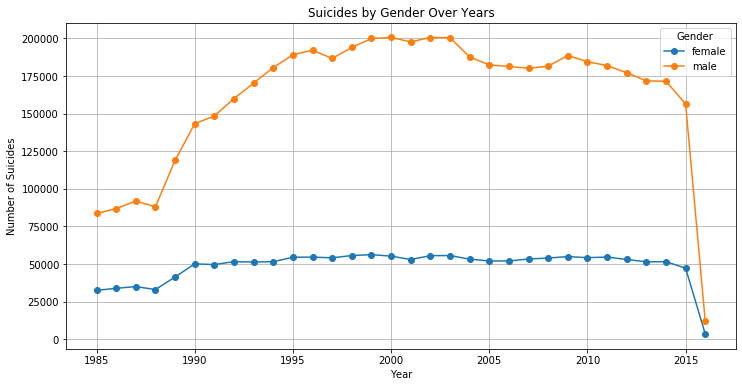

(('Russian Federation', 1209742), ('Saint Kitts and Nevis', 0))

In [4]:
# Finding the country/state with the most and the least suicides
country_most_suicides = group_by_country.idxmax()
country_least_suicides = group_by_country.idxmin()
most_suicides_country = group_by_country.max()
least_suicides_country = group_by_country.min()

# Detailed analysis of the relationship between gender and the number of suicides
gender_suicides = data.groupby(['year', 'sex'])['suicides_no'].sum().unstack()
gender_suicides.plot(figsize=(12, 6), marker='o')
plt.title('Suicides by Gender Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.grid(True)
plt.legend(title='Gender')
plt.show()

(country_most_suicides, most_suicides_country), (country_least_suicides, least_suicides_country)


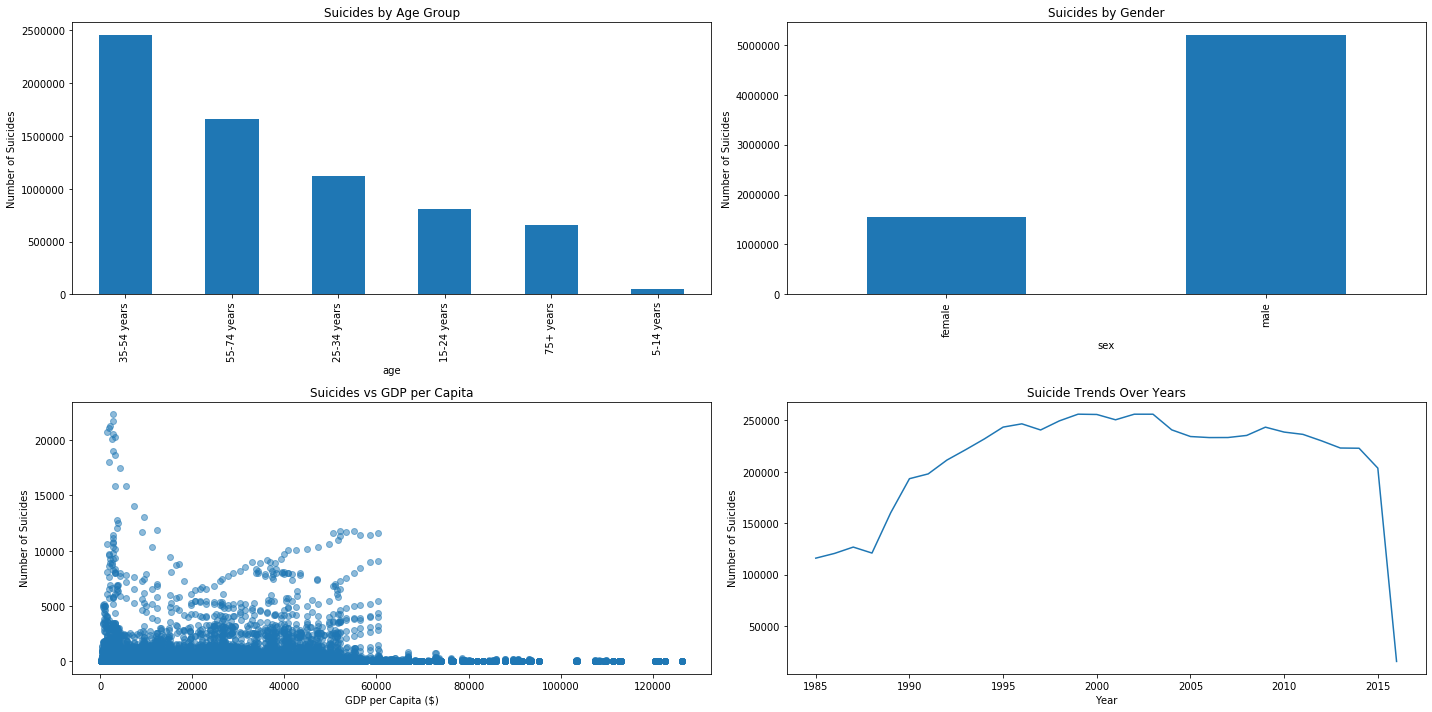

In [5]:
# Grouping and analyzing data by age group
suicides_by_age_group = data.groupby('age')['suicides_no'].sum().sort_values(ascending=False)

# Grouping and analyzing data by gender
suicides_by_gender = data.groupby('sex')['suicides_no'].sum()

# Grouping and analyzing data by GDP per capita
suicides_by_gdp = data.groupby('gdp_per_capita ($)')['suicides_no'].sum()

# Grouping and analyzing data by year to see trends
suicides_by_year = data.groupby('year')['suicides_no'].sum()

# Plotting the findings
plt.figure(figsize=(20, 10))

# Suicides by Age Group
plt.subplot(2, 2, 1)
suicides_by_age_group.plot(kind='bar')
plt.title('Suicides by Age Group')
plt.ylabel('Number of Suicides')

# Suicides by Gender
plt.subplot(2, 2, 2)
suicides_by_gender.plot(kind='bar')
plt.title('Suicides by Gender')
plt.ylabel('Number of Suicides')

# Suicides by GDP per Capita
plt.subplot(2, 2, 3)
plt.scatter(data['gdp_per_capita ($)'], data['suicides_no'], alpha=0.5)
plt.title('Suicides vs GDP per Capita')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Number of Suicides')

# Suicides by Year (Trends)
plt.subplot(2, 2, 4)
suicides_by_year.plot()
plt.title('Suicide Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')

plt.tight_layout()
plt.show()


In [6]:
summary_continuous = data[['year', 'population', 'gdp_per_capita ($)', 'suicides_no']].describe()
print(summary_continuous)


               year    population  gdp_per_capita ($)   suicides_no
count  27820.000000  2.782000e+04        27820.000000  27820.000000
mean    2001.258375  1.844794e+06        16866.464414    242.574407
std        8.469055  3.911779e+06        18887.576472    902.047917
min     1985.000000  2.780000e+02          251.000000      0.000000
25%     1995.000000  9.749850e+04         3447.000000      3.000000
50%     2002.000000  4.301500e+05         9372.000000     25.000000
75%     2008.000000  1.486143e+06        24874.000000    131.000000
max     2016.000000  4.380521e+07       126352.000000  22338.000000


In [7]:
frequency_sex = data['sex'].value_counts()
frequency_age = data['age'].value_counts()
frequency_country = data['country'].value_counts()

print(frequency_sex)
print(frequency_age)
print(frequency_country.head())  # Displaying top 5 countries for brevity


female    13910
male      13910
Name: sex, dtype: int64
75+ years      4642
25-34 years    4642
55-74 years    4642
15-24 years    4642
35-54 years    4642
5-14 years     4610
Name: age, dtype: int64
Mauritius      382
Austria        382
Iceland        382
Netherlands    382
Chile          372
Name: country, dtype: int64


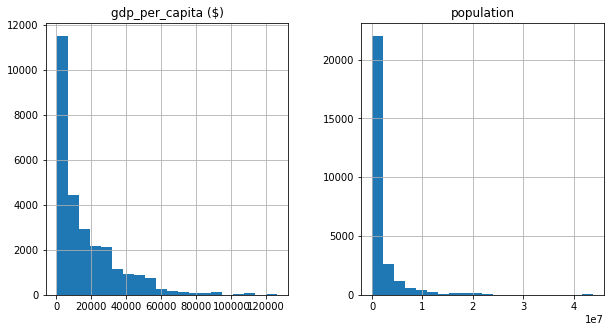

In [8]:
data[['population', 'gdp_per_capita ($)']].hist(bins=20, figsize=(10, 5))
plt.show()


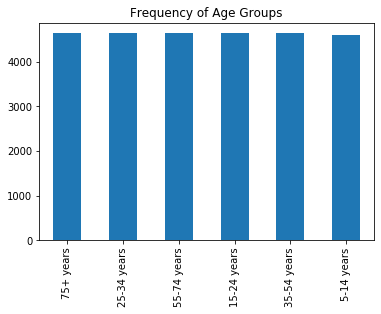

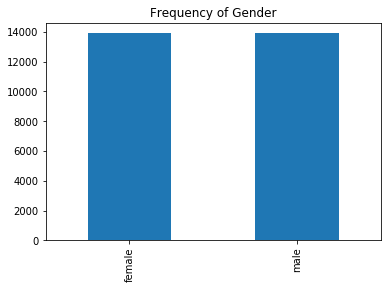

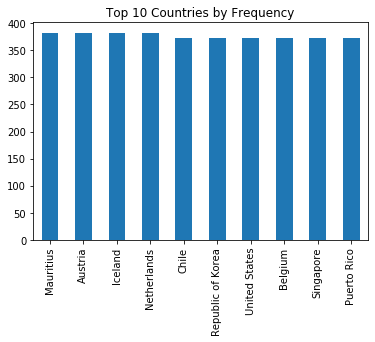

In [9]:
data['age'].value_counts().plot(kind='bar')
plt.title('Frequency of Age Groups')
plt.show()

data['sex'].value_counts().plot(kind='bar')
plt.title('Frequency of Gender')
plt.show()

data['country'].value_counts().head(10).plot(kind='bar')  # Top 10 countries
plt.title('Top 10 Countries by Frequency')
plt.show()


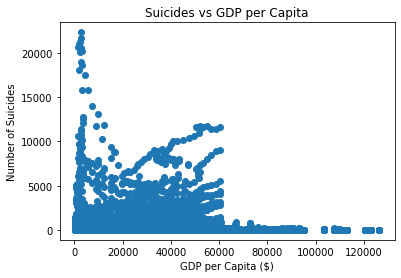

In [10]:
plt.scatter(data['gdp_per_capita ($)'], data['suicides_no'])
plt.title('Suicides vs GDP per Capita')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Number of Suicides')
plt.show()
